In [148]:
%matplotlib inline
import sys
sys.path.append('/home/yoshida/.pyenv/versions/3.6.6/lib/python3.6/site-packages')

from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

In [149]:
iris = load_iris() #irisデータの読み込み

In [150]:
#説明変数は、n✕4で、目的変数は、1✕nであった。
#そこで、目的変数をn✕1に変換(reshape)し、説明変数と目的変数を横方向(axis=1)にくっつけて、n✕5の行列
data = np.concatenate((iris.data, iris.target.reshape(-1, 1)), axis=1)

np.set_printoptions(threshold=0) #n行が長いので、下記のコマンドで省略の行列を出力
data

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       ...,
       [6.5, 3. , 5.2, 2. , 2. ],
       [6.2, 3.4, 5.4, 2.3, 2. ],
       [5.9, 3. , 5.1, 1.8, 2. ]])

In [151]:
#pandasのDataFrame型で、この行列をきれいな表に変換
df = pd.DataFrame(data)

#feature_namesに、列名が入っている
print(iris.feature_names)
cols = iris.feature_names

#"feature_names"に、"type"という目的変数用の列名が入っていないので、appendする
cols.append('type')
df.columns = cols
df.head()

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [152]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [153]:
x1 = iris.data[:,2].reshape(-1,1) #petal lengthの全部のデータをn✕1の配列で取得
x2 = iris.data[:,3].reshape(-1,1) #petal widthの全部のデータをn×1の配列で取得

#目的変数を作成
y = iris.target #目的変数"type"の全データを1✕nの配列で取得
x = np.concatenate((x1, x2), axis=1) #配列を軸指定して結合
x

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       ...,
       [5.2, 2. ],
       [5.4, 2.3],
       [5.1, 1.8]])

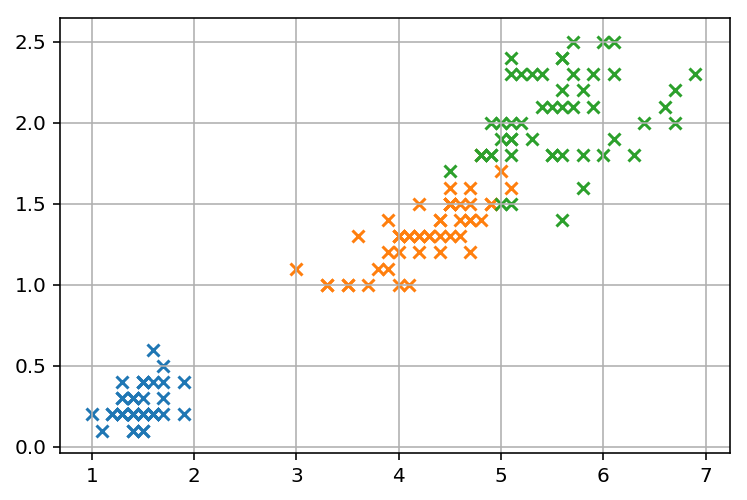

In [154]:
#訓練データ：テストデータ＝7：3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

#横軸がx1、縦軸がx2
plt.scatter(x1[y==0], x2[y==0], marker="x") #目的変数yが0のx1とx2を表示
plt.scatter(x1[y==1], x2[y==1], marker="x") #目的変数yが1のx1とx2を表示
plt.scatter(x1[y==2], x2[y==2], marker="x") #目的変数yが2のx1とx2を表示
plt.grid()
plt.show()

In [155]:
#標準化について

In [156]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler() 

#訓練データを標準化
x_train_std = stdsc.fit_transform(x_train)


#訓練データを基準に、テストデータも標準化
x_test_std = stdsc.transform(x_test)

print(x_train_std.mean())
print(x_train_std.std())
#テスト用は、trainを基準に標準化しているため、多少0、1からずれる
print(x_test_std.mean())
print(x_test_std.std())

3.425831047414769e-16
1.0000000000000002
-0.1110109621182351
1.040586519459273


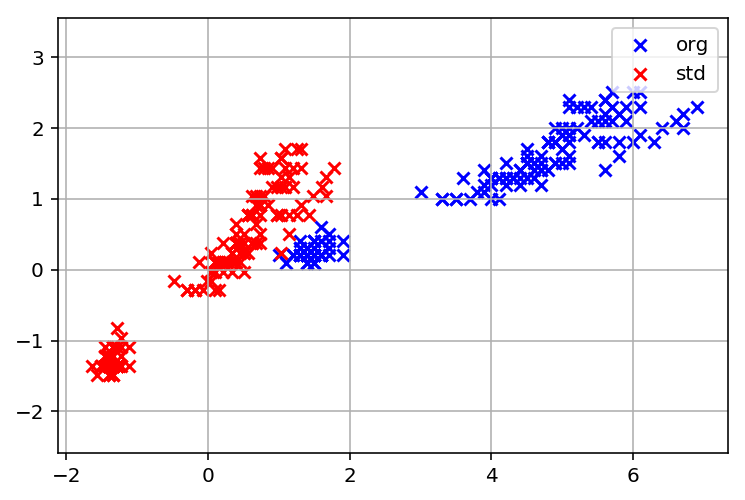

In [157]:
#標準化前と標準化後のデータをplotする

plt.axis('equal')
#標準化前
plt.scatter(x[:,0],x[:,1], c='blue', marker="x", label="org")

#標準化後
x_std = stdsc.transform(x)
plt.scatter(x_std[:,0],x_std[:,1], c='red', marker="x", label="std")

plt.legend()
plt.grid()
plt.show()

In [158]:
# 標準化による学習結果の違い 〜ロジスティック回帰〜

In [159]:
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

lr = LogisticRegression()
lr_std = LogisticRegression()

#標準化前
lr.fit(x_train, y_train)
print('元データのスコア:', lr.score(x_train, y_train)) # 訓練データによる標準化前の予測精度

#標準化後
lr_std.fit(x_train_std, y_train)
print('標準化したデータのスコア', lr_std.score(x_train_std, y_train)) # 訓練データによる標準化後の予測精度

元データのスコア: 0.8666666666666667
標準化したデータのスコア 0.9523809523809523


/home/yoshida/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yoshida/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/yoshida/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yoshida/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [160]:
# fittingの結果のち外を確認するため、以下のように決定境界をplotする関数を定義

In [161]:
def decision(X, y, model, scale):
    colors = 'red,blue,lightgreen'.split(',')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min(), X[:,0].max()
    x2_min, x2_max = X[:, 1].min(), X[:,1].max()
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02*scale),
                          np.arange(x2_min, x2_max, 0.02*scale))
    z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],
                   alpha=0.8, c=cmap(idx),
                   label=cl)